In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone

In [55]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [58]:
df = df.drop(columns=['ID'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        699 non-null    int64 
 1   UnifSize     699 non-null    int64 
 2   UnifShape    699 non-null    int64 
 3   MargAdh      699 non-null    int64 
 4   SingEpiSize  699 non-null    int64 
 5   BareNuc      699 non-null    object
 6   BlandChrom   699 non-null    int64 
 7   NormNucl     699 non-null    int64 
 8   Mit          699 non-null    int64 
 9   Class        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [59]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int32
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 56.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D64D6EE508>,
      dtype=object)

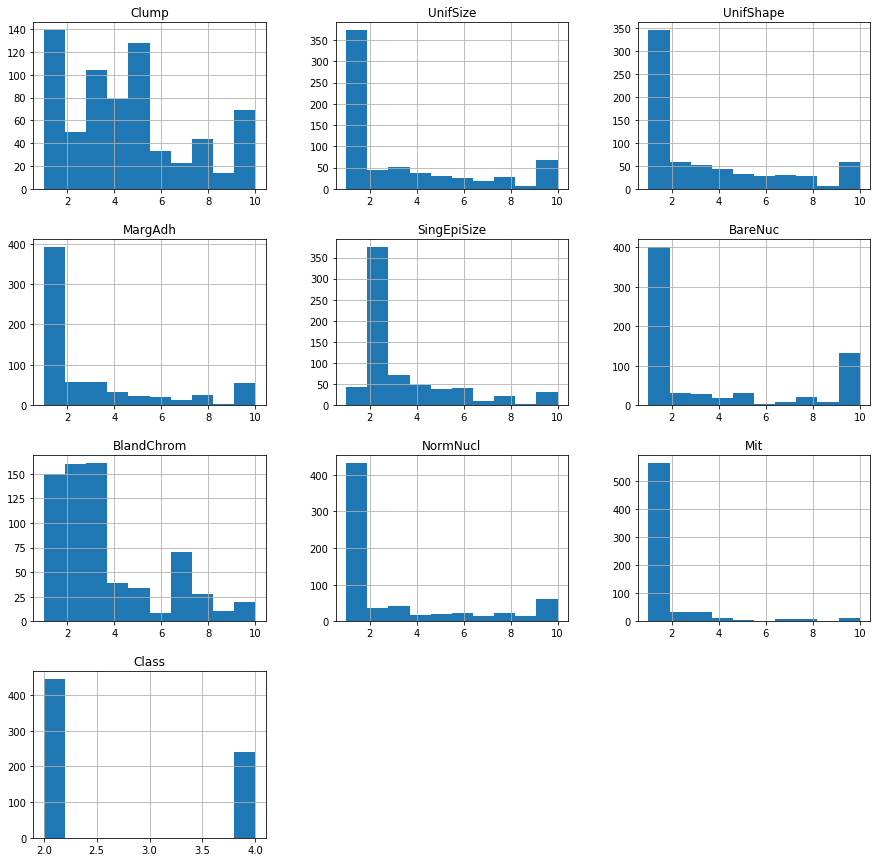

In [60]:
df.hist(figsize=(15, 15))

In [61]:
target_labels = {2: 'benign', 4: 'malignant'}

In [62]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
model = SVC(kernel='rbf')
scores = cross_val_score(clone(model), X, y, cv=10)
print(f'Cross Validation Results: {scores * 100} %')
print(f'Avg Accuracy: { scores.mean() * 100 } %')

Cross Validation Results: [ 92.75362319  98.55072464  95.65217391  94.11764706  98.52941176
  97.05882353  97.05882353 100.          98.52941176  98.52941176] %
Avg Accuracy: 97.0780051150895 %


Accuracy: 95.13274336283186 %
Classification Report: 
               precision    recall  f1-score   support

      benign       0.98      0.95      0.96       147
   malignant       0.90      0.96      0.93        79

    accuracy                           0.95       226
   macro avg       0.94      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



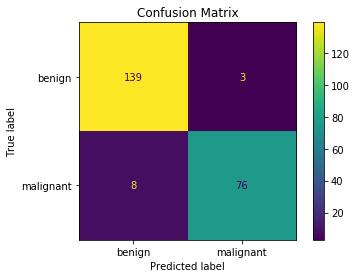

In [73]:
y_predict = model.fit(X_train, y_train).predict(X_test)
print(f'Accuracy: {accuracy_score(y_predict, y_test) * 100} %')
print(f'Classification Report: \n {classification_report(y_predict, y_test, target_names = target_labels.values())}')
plot_confusion_matrix(model, X_test, y_test, display_labels = target_labels.values(), values_format='d')
plt.title('Confusion Matrix')
plt.show()